In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from dateutil import parser
from datetime import datetime
from prepare_data import read_data
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

In [2]:
# incidents = read_data()
incidents = pd.read_csv('data/cleaned_data_no_zeros.csv', sep = None, dtype={'YEAR OCCURRED': np.int_, 'MONTH OCCURRED': np.int_,'GEO CODE': np.str_, 'CRIME CATEGORY DESCRIPTION': np.str_,}, engine = 'python')

In [3]:
incidents.head(20)

,Unnamed: 0,CRIME CATEGORY DESCRIPTION,RESPONSE TIME,MINS OF DAY,DAY OF WEEK,DAY OF MONTH,DAY OF YEAR,MONTH OCCURRED,YEAR OCCURRED,GEO CODE,LATITUDE,LONGITUDE
0,1,Traffic Offenses,14.0,1138.0,1.0,18.0,169.0,6,2019,546-15,NaN,NaN
1,2,Accident,7.0,945.0,4.0,28.0,241.0,8,2020,546-11,40.116511,-88.210833
2,7,Disorderly Conduct,9.0,665.0,4.0,8.0,312.0,11,2013,576-11,40.101881,-88.200156
3,9,Traffic Offenses,6.0,1176.0,0.0,23.0,328.0,11,2020,605-08,NaN,NaN
4,11,Crisis Intervention,6.0,1044.0,6.0,22.0,327.0,11,2020,577-04,NaN,NaN
5,15,Deception & Fraud,45.0,928.0,4.0,20.0,325.0,11,2020,605-03,40.096245,-88.196205
6,16,Accident,10.0,511.0,4.0,4.0,339.0,12,2020,546-14,40.112903,-88.214148
7,18,Robbery,3.0,1201.0,2.0,16.0,16.0,1,2019,605-12,NaN,NaN
8,19,Accident,9.0,1319.0,5.0,2.0,123.0,5,2020,605-02,40.095606,-88.202741
9,21,Traffic Offenses,8.0,905.0,0.0,23.0,328.0,11,2020,548-09,40.115093,-88.182644


In [4]:
# incidents['CRIME CATEGORY ARRAY'] = incidents['CRIME CATEGORY ARRAY'].apply(lambda x: np.array(x))
# incidents['GEO CODE ARRAY'] = incidents['GEO CODE ARRAY'].apply(lambda x: np.array(x))

y = incidents['RESPONSE TIME']
X = incidents.drop(columns=['RESPONSE TIME'])
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]

X.head()

,CRIME CATEGORY DESCRIPTION,MINS OF DAY,DAY OF WEEK,DAY OF MONTH,DAY OF YEAR,MONTH OCCURRED,YEAR OCCURRED,GEO CODE,LATITUDE,LONGITUDE
0,Traffic Offenses,1138.0,1.0,18.0,169.0,6,2019,546-15,NaN,NaN
1,Accident,945.0,4.0,28.0,241.0,8,2020,546-11,40.116511,-88.210833
2,Disorderly Conduct,665.0,4.0,8.0,312.0,11,2013,576-11,40.101881,-88.200156
3,Traffic Offenses,1176.0,0.0,23.0,328.0,11,2020,605-08,NaN,NaN
4,Crisis Intervention,1044.0,6.0,22.0,327.0,11,2020,577-04,NaN,NaN


In [5]:
unique_crime_categories = incidents['CRIME CATEGORY DESCRIPTION'].unique()
unique_geocode = incidents['GEO CODE'].unique()
attribs = ['CRIME CATEGORY DESCRIPTION','GEO CODE']
full_pipeline = ColumnTransformer([('CRIME CATEGORY', OneHotEncoder(handle_unknown='ignore'), attribs)], remainder='passthrough')
encoder = full_pipeline.fit(X)
X = encoder.transform(X)

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


In [6]:
model = XGBClassifier()

In [7]:
model.fit(X_train, y_train)

C:\Users\jlivs\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [9]:
accuracy = accuracy_score(y_test, predictions)

In [10]:
accuracy

0.16728222014565627

In [7]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [10]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[22:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 16.792177


In [12]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[22:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[22:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

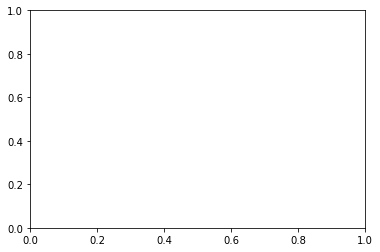

In [14]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

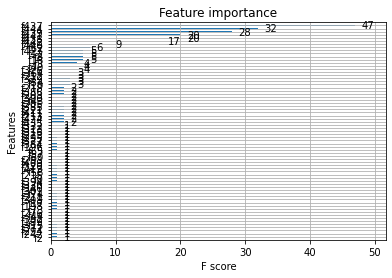

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

NameError: name 'pyplot' is not defined

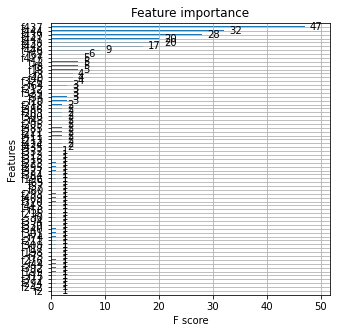

In [19]:
plot_importance(xg_reg)
pyplot.show()

<AxesSubplot:>

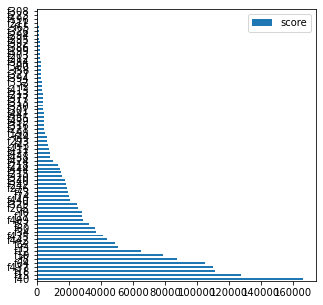

In [30]:
feature_important = xg_reg.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')